In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

import qiskit.quantum_info as qi

import numpy as np

In [2]:
# caso 1 : 3 qubits para codificação

qpe = QuantumCircuit(4,3)
qpe.x(3)
qpe.h(range(3))

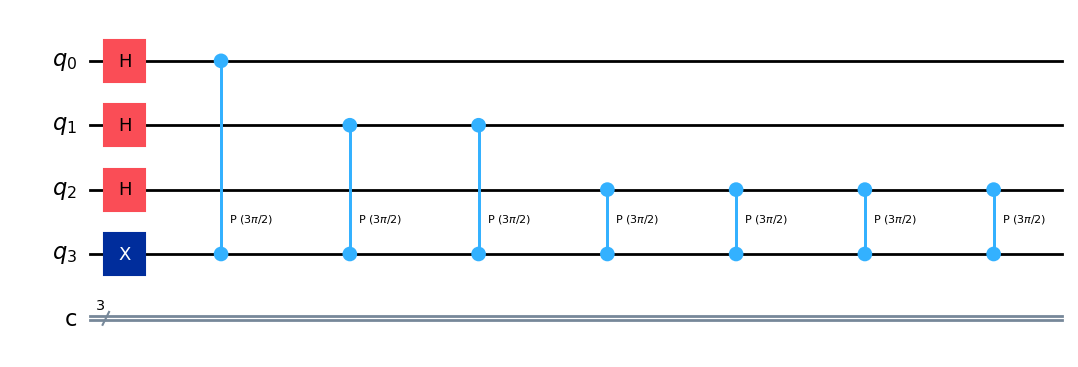

In [3]:
#introduzindo as fases controladas
theta = 6/8
angle = 2*np.pi*theta

repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(angle, counting_qubit, 3)
    repetitions *= 2
qpe.draw("mpl", fold=-1)

In [4]:
def qft_rotations(circuit,n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit,n)
    return circuit
    

In [5]:
# transformada de Fourier inversa
qft_circ = qft(QuantumCircuit(3),3)
invqft_circ = qft_circ.inverse()

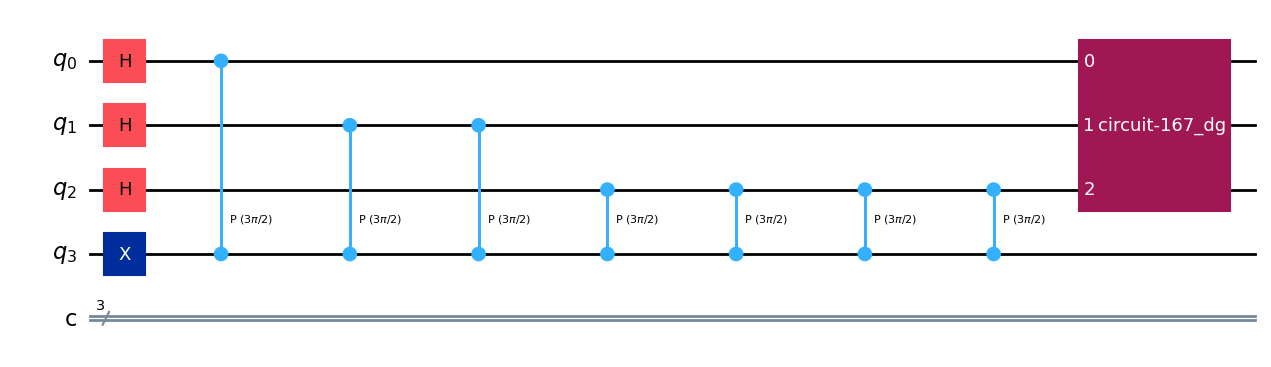

In [6]:
#adicioa a tranformada de Fourier inversa no QPE circuit
qpe.append(invqft_circ, qpe.qubits[:3])
qpe.draw("mpl", fold=-1)

In [7]:
qpe.measure(range(3),range(3))

In [8]:
simulator_aer = AerSimulator()
qct = transpile(qpe, backend=simulator_aer)
counts = simulator_aer.run(qct, shots=1000).result().get_counts()
print(counts)

{'110': 1000}


In [9]:
resp = list(counts.items())[0][0]
int(resp,2)

6